In [15]:
import librosa
import librosa.display
import obspy
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import tsfel
import pandas as pd
import csv

In [16]:
# Getting wave_files_paths
wav_files_paths = []

# Open the CSV file in read mode
with open('wav_files_paths.csv', 'r') as file:
    reader = csv.reader(file)
    # Iterate through the rows in the CSV file
    for row in reader:
        # Append each row to the list
        wav_files_paths.append(row[0])

print(wav_files_paths[0])
print(wav_files_paths[30])

./data/wav/OS_7_05_2019_08_24_00_.wav
./data/wav/rpi-port-townsend_2019_11_14_14_28_00.wav


In [17]:
# Splitting all wav data into minute-long snippets

full_audio_data_split = np.array([])
full_audio_data_list_split = []
for path in wav_files_paths:
    data, sample_rate = librosa.load(path) # data, sampling rate
    
    # Calculate the length of each segment
    segment_length = sample_rate * 60
    
    # Calculate the number of segments
    num_segments = len(data) // segment_length
    
    # Reshape the data into segments
    segments = np.reshape(data[:num_segments * segment_length], 
                          (num_segments, segment_length))
    
    # Add to full_audio_data_list_split
    full_audio_data_list_split.append(segments)
    
# Transfer data from list to np array
full_audio_data_split = np.concatenate(full_audio_data_list_split)
print(full_audio_data_split.shape)

(747, 1323000)


In [2]:
cfg = tsfel.get_features_by_domain('temporal')

In [18]:
features_df = []
for i in range(10):
    if i == 0:
        features_df = tsfel.time_series_features_extractor(cfg, full_audio_data_split[i], fs= sample_rate, window_size=sample_rate*60)
    else:
        df2 = tsfel.time_series_features_extractor(cfg, full_audio_data_split[i], fs= sample_rate, window_size=sample_rate*60)
        features_df = pd.concat([features_df, df2])

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [29]:
features_df


,0_Area under the curve,0_Autocorrelation,0_Centroid,0_Mean absolute diff,0_Mean diff,0_Median absolute diff,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Zero crossing rate
0,2.047451,3577.385913,29.479344,0.043519,-3.816187e-08,0.035827,0.000060,310292.0,65607.0,310293.0,1.325080e+06,1.035791e-12,57574.959587,477018.0
0,1.346620,1544.690128,27.261171,0.028521,3.997081e-09,0.023345,0.000008,311534.0,63445.0,311534.0,1.323895e+06,-2.743666e-12,37732.620064,476092.0
0,1.063939,978.720325,28.931616,0.022927,3.179015e-09,0.018367,-0.000011,314298.0,64469.0,314298.0,1.323603e+06,-1.335923e-12,30332.781583,475132.0
0,0.994843,868.127614,26.161170,0.020188,-3.137487e-08,0.015563,0.000017,303630.0,64290.0,303629.0,1.323511e+06,-9.040934e-13,26708.918963,447913.0
0,0.775109,576.840679,30.214515,0.013563,-1.487045e-08,0.010150,-0.000002,320426.0,66010.0,320427.0,1.323260e+06,-6.189605e-13,17943.832610,397790.0
0,0.802663,668.079932,28.862376,0.015406,3.023773e-08,0.011637,-0.000014,326929.0,64511.0,326929.0,1.323339e+06,-5.691506e-14,20381.880158,433477.0
0,0.819096,833.338720,27.632388,0.015579,-1.410234e-08,0.010907,0.000011,324291.0,65191.0,324290.0,1.323412e+06,1.200574e-12,20611.460107,419883.0
0,0.693911,489.158286,28.368696,0.013267,-2.955199e-08,0.009479,-0.000019,330353.0,63766.0,330353.0,1.323258e+06,-2.607385e-12,17552.063218,418073.0
0,0.776891,696.226780,30.524361,0.017126,-1.139342e-08,0.010742,-0.000004,346553.0,62438.0,346552.0,1.323489e+06,-1.572945e-11,22658.100149,451462.0
0,0.802466,729.378331,31.409145,0.017339,-8.323974e-08,0.011187,0.000017,344901.0,61645.0,344901.0,1.323481e+06,-2.104086e-11,22940.059877,455303.0


In [21]:
# Creating csv file with all features
features_df.to_csv('features.csv', index=False)

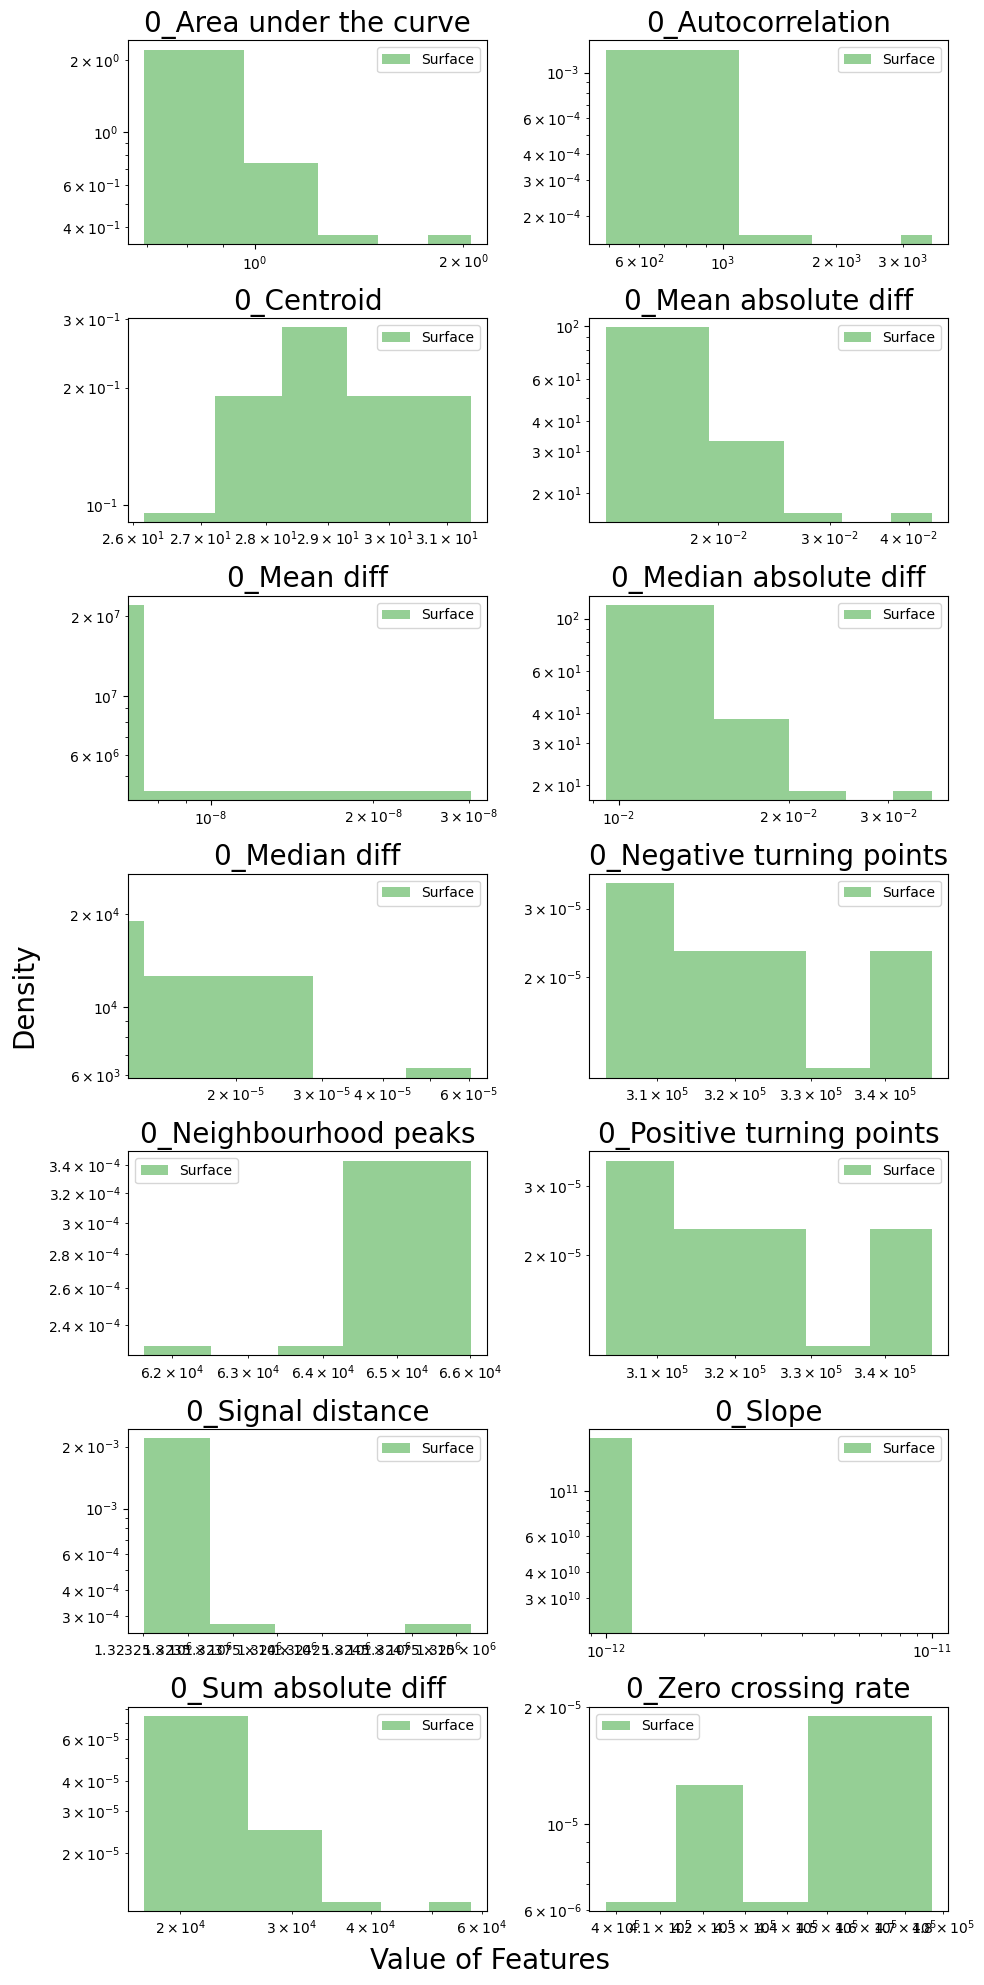

In [51]:
# Plotting histograms for the features

# filtered_df = interquartile(features_df)
filtered_df = features_df

# Define a function for histogram plotting
def plot_histogram(ax, feature_data, label, color, num_bins, title):
    ax.hist(x=feature_data, bins=num_bins, density=True, color=color, alpha=0.5, label=label)
    ax.legend()
    ax.set_title(title, fontsize=20)

# Define common parameters
num_bins = 5
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=[10, 20])


# Define features to plot
features = filtered_df.columns.tolist()
color = '#2ca02c'
label = 'Surface'

# Iterate over features and plot histograms
for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    plot_histogram(ax[row, col], filtered_df[feature].values, label, color, num_bins, feature)
    ax[row, col].set_xscale('log')
    ax[row, col].set_yscale('log')
    
fig.supylabel('Density', fontsize=20)
fig.supxlabel('Value of Features', fontsize=20)
fig.tight_layout()
plt.show()